In [1]:
# Import neccessary libraries
import numpy as np
import matplotlib.pyplot as plt

# 2. The least-squares solution for the fitting of a parabola

In [2]:
# Load the data
data = np.loadtxt('census-2000.txt')

# Extract years and populations
years = data[:, 0]
populations = data[:, 1]

In [10]:
# Function ls_fit
def ls_fit(z, d):
    n = len(z)
    A = np.array([
        [n, np.sum(z), np.sum(z**2)],
        [np.sum(z), np.sum(z**2), np.sum(z**3)],
        [np.sum(z**2), np.sum(z**3), np.sum(z**4)]
    ])
    b = np.array([np.sum(d), np.sum(d*z), np.sum(d*z**2)])
    m_ls = np.linalg.solve(A, b)
    return m_ls

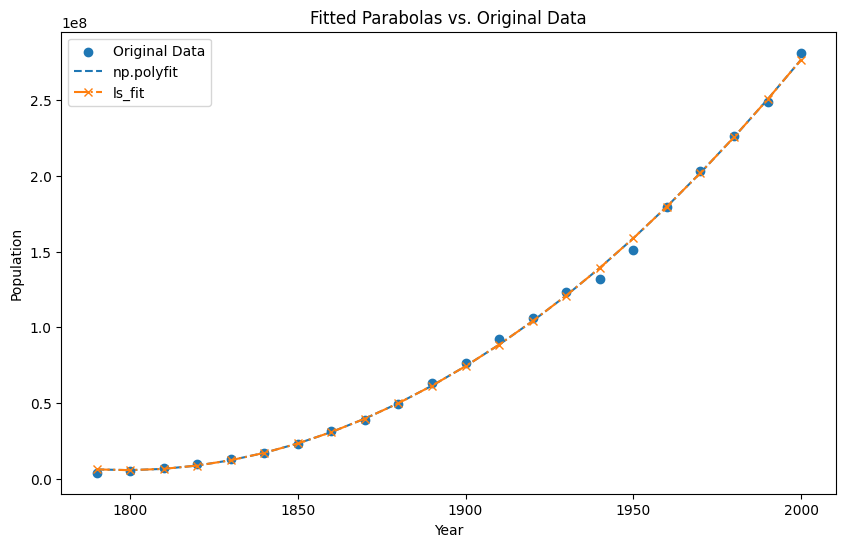

In [18]:
m = ls_fit(years, populations)
parabola = np.poly1d(m[::-1])  # Creating a polynomial from coefficients in reverse order

# Plotting original data and the fitted polynomials
plt.figure(figsize=(10, 6))
plt.scatter(years, populations, label='Original Data')
plt.plot(years, np.polyval(np.polyfit(years, populations, 2), years), label='np.polyfit', linestyle='--')
plt.plot(years, parabola(years), label='ls_fit', linestyle='-.', marker = 'x' )
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.title('Fitted Parabolas vs. Original Data')
plt.show()

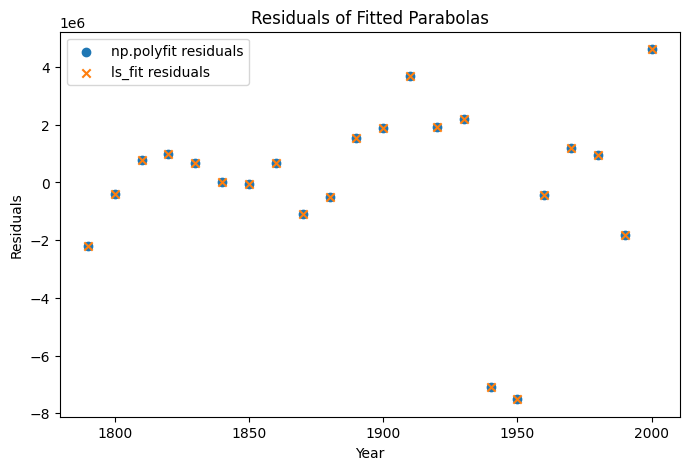

Norm of np.polyfit residuals: 13065948.906145306
Norm of ls_fit residuals: 13065948.906146463


In [20]:
residuals_polyfit = populations - np.polyval(np.polyfit(years, populations, 2), years)
residuals_ls_fit = populations - parabola(years)

# Plotting the residuals
plt.figure(figsize=(8, 5))
plt.scatter(years, residuals_polyfit, label='np.polyfit residuals')
plt.scatter(years, residuals_ls_fit, label='ls_fit residuals', marker = 'x')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals of Fitted Parabolas')
plt.show()

# Calculating the norms of residuals
norm_residuals_polyfit = np.linalg.norm(residuals_polyfit)
norm_residuals_ls_fit = np.linalg.norm(residuals_ls_fit)
print("Norm of np.polyfit residuals:", norm_residuals_polyfit)
print("Norm of ls_fit residuals:", norm_residuals_ls_fit)

In [22]:
# Predictions for the years 1950, 1970, and 2020
prediction_1950_ls = m[0] + m[1]*1950 + m[2]*1950**2
prediction_1970_ls = m[0] + m[1]*1970 + m[2]*1970**2
prediction_2020_ls = m[0] + m[1]*2020 + m[2]*2020**2

# Display predictions
print('\nPredictions:')
print(f'Least Squares Fit Prediction for 1950: {prediction_1950_ls}')
print(f'Least Squares Fit Prediction for 1970: {prediction_1970_ls}')
print(f'Least Squares Fit Prediction for 2020: {prediction_2020_ls}')


Predictions:
Least Squares Fit Prediction for 1950: 158835900.26280975
Least Squares Fit Prediction for 1970: 202010600.12122345
Least Squares Fit Prediction for 2020: 333363431.2077637
